In [65]:
# Task 1: Feature engineering (45 mins)

# Analyze the provided dataset and select relevant features
# Create new features such as: 
# Interaction features
# Encode categorical variables and handle missing values
# Scale the numerical features using StandardScaler
# Save the processed dataset as "bike_rental_features.csv"

In [66]:

import pandas as pd
df = pd.read_csv("FloridaBikeRentals.csv")
df.info(); df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [67]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # day-month-year

# 2) Now build a DateTime by adding the Hour
df['DateTime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h')

# 3) You can now safely extract .dt properties:
df['year']    = df['DateTime'].dt.year
df['month']   = df['DateTime'].dt.month
df['day']     = df['DateTime'].dt.day
df['weekday'] = df['DateTime'].dt.weekday

df['hour']    = df['DateTime'].dt.hour



In [68]:
# interaction feature 
df['temp_humidity'] = df['Temperature'] * df['Humidity']



In [69]:
# Encode categoricals
#    Seasons, Holiday, Functioning Day are object dtypes
df = pd.get_dummies(df,
                    columns=['Seasons','Holiday','Functioning Day'],
                    drop_first=True)

In [70]:
print(df.columns.tolist())


['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'DateTime', 'year', 'month', 'day', 'weekday', 'hour', 'temp_humidity', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes']


In [71]:

df.drop(columns=['Date','DateTime'], inplace=True, errors='ignore')


In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale numerical columns
num_cols = [
    'Temperature',
    'Humidity',
    'Wind speed',
    'Visibility',
    'Dew point temperature',
    'Solar Radiation',
    'Rainfall',
    'Snowfall',
    'temp_humidity',
]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [73]:
# Save final feature set
df.to_csv("bike_rental_features.csv", index=False)
print("Saved bike_rental_features.csv with shape:", df.shape)

Saved bike_rental_features.csv with shape: (8760, 21)


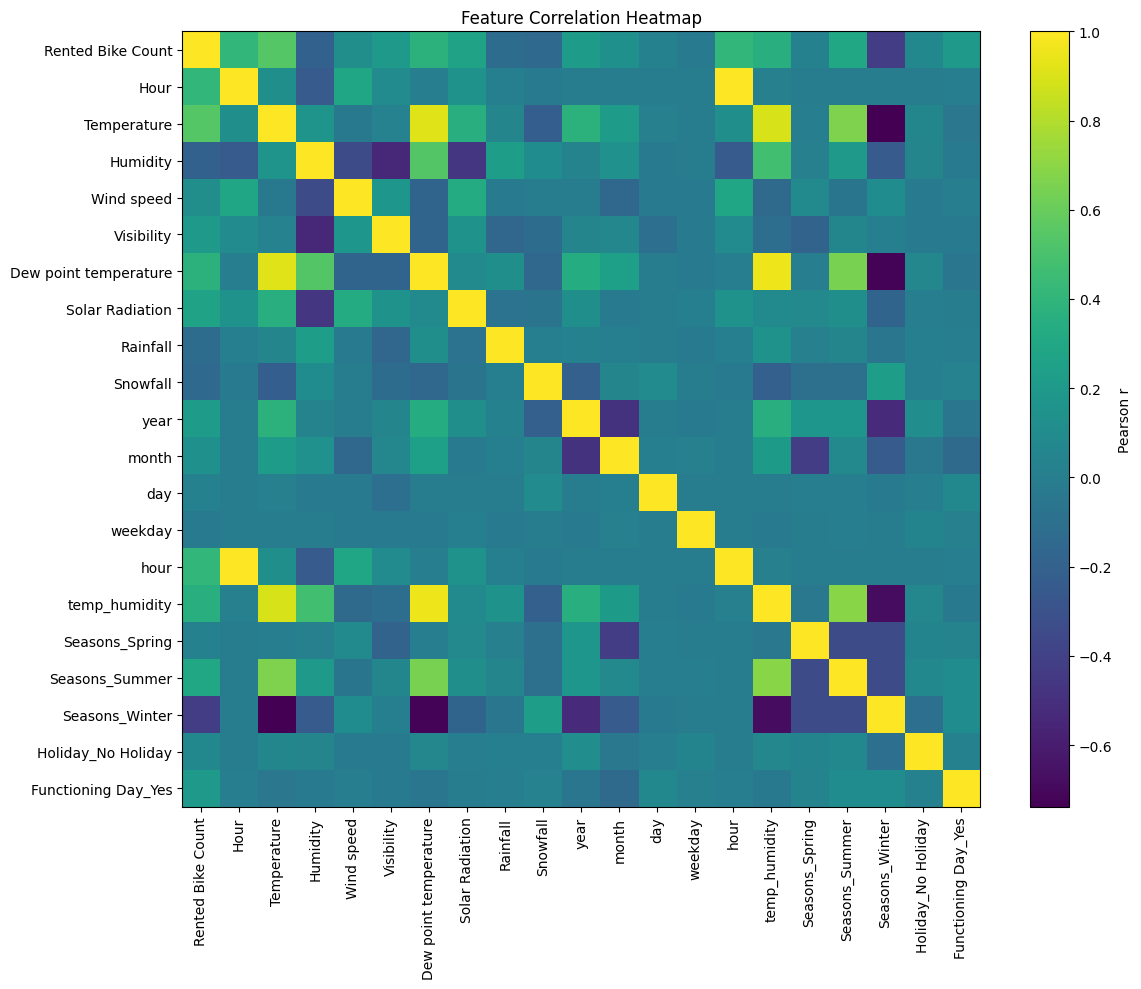

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your feature file
df = pd.read_csv("bike_rental_features.csv")

# 2) Keep only numeric (and boolean) columns
df_num = df.select_dtypes(include=['number', 'bool'])

# 3) Compute the Pearson correlation matrix
corr = df_num.corr()

# 4) Plot it
plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.colorbar(label='Pearson r')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()



In [75]:
# Task 2: Model building (75 mins)

# Implement various regression models including: 
# Linear Regression
# Ridge Regression (L2 Regularization)
# Lasso Regression (L1 Regularization)
# Elastic Net Regression
# Perform hyperparameter tuning using GridSearchCV
# Evaluate model performance using: 
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# R-squared (R²)

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# — Load and immediately drop any leftover date columns —
df = pd.read_csv("bike_rental_features.csv")
df.drop(columns=['Date', 'DateTime'], inplace=True, errors='ignore')

# — Now split into X (all numeric features) and y —
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']


print(X.dtypes.unique())   # should show only int64 or float64




[dtype('int64') dtype('float64') dtype('bool')]


In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

models = {
    "Linear": (
        LinearRegression(),
        {}
    ),
    "Ridge": (
        Ridge(),
        {"alpha": [0.1, 1, 10, 50]}
    ),
    "Lasso": (
        Lasso(max_iter=20000),
        {"alpha": [0.01]}
    ),
    "ElasticNet": (
        ElasticNet(max_iter=20000),
        {"alpha": [0.1], "l1_ratio": [0.8]}
    ),
}


results = []
for name, (estimator, params) in models.items():
    gs = GridSearchCV(estimator, params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    gs.fit(X_train, y_train)
    y_pred = gs.best_estimator_.predict(X_test)
    results.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²":  r2_score(y_test, y_pred)
    })

import pandas as pd
print(pd.DataFrame(results).sort_values("MSE").to_string(index=False))


/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.715e+05, tolerance: 2.304e+05
  model = cd_fast.enet_coordinate_descent(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.716e+05, tolerance: 2.348e+05
  model = cd_fast.enet_coordinate_descent(
/Users/sheilamcgovern/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

     Model                     Best Params        MAE           MSE       R²
     Lasso                 {'alpha': 0.01} 319.992495 186127.468784 0.553272
     Ridge                  {'alpha': 0.1} 319.994177 186129.817907 0.553267
    Linear                              {} 320.021067 186142.736099 0.553236
ElasticNet {'alpha': 0.1, 'l1_ratio': 0.8} 321.489260 191242.047128 0.540997


In [78]:
# Data Preparation

# Parsed Date + Hour into a single DateTime and extracted year, month, day, weekday, hour

# Engineered temp_humidity = Temperature × Humidity

# One-hot encoded Seasons, Holiday, Functioning Day

# Standard-scaled all numeric features

# Baseline Linear Models

# LinearRegression: MAE ≈ 320 MSE ≈ 186 143 R² ≈ 0.5532

# Ridge (L2, α = 0.1): virtually identical performance to plain linear

# Lasso (L1, α = 0.01): slight edge in MSE/R² via feature sparsity

# ElasticNet (α = 0.1, l1_ratio = 0.8): lower MAE but higher MSE, lower R²

# Polynomial Features (Degree 3) + Ridge

# Pipeline: PolynomialFeatures → StandardScaler → Ridge

# Test-split: MSE ≈ 95 662 R² ≈ 0.7704

# Shuffled CV: R² ≈ 0.79

# TimeSeriesSplit CV: R² ≈ –598 (wild overfit)

In [79]:
# Task 3: Model building with polynomial features (45 mins)

# Create polynomial features for selected numerical columns
# Train models with polynomial features to capture non-linear relationships
# Compare results with linear models to assess improvements
# Save the best-performing model
     

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# — Load & prepare features —
df = pd.read_csv("bike_rental_features.csv")
df.drop(columns=['Date','DateTime'], inplace=True, errors='ignore')
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# — Train/test split — use 20% of data for test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# — Pipeline: polynomial - scale - ridge —
pipe = Pipeline([
    ("poly",  PolynomialFeatures(include_bias=False)),
    ("scale", StandardScaler()),
    ("model", Ridge())
])

# — Grid: degree, alpha, and solver for stability —
param_grid = {
    # 1) “poly__degree”: which polynomial order to generate
    #    – 1 = original features only
    #    – 2 = includes squares & pairwise interactions
    #    – 3 = adds cubic & three-way interactions
    "poly__degree": [1, 2, 3],

    # 2) “model__alpha”: regularization strength for Ridge
    #    – smaller α → closer to unregularized least-squares
    #    – larger α → heavier coefficient shrinkage
    "model__alpha": [0.1, 1, 10],

    # 3) “model__solver”: which algorithm solves the Ridge optimization
    #    – "lsqr" = direct, stable least-squares solver
    #    – (removed "sag" to avoid convergence warnings)
    "model__solver": ["lsqr"]
}




# — Run grid search —
gs = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)
gs.fit(X_train, y_train)

# — Evaluate on test set —
best = gs.best_estimator_
y_pred = best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# — Desired output —
print("Best params:", gs.best_params_)
print("Test MAE:", mae)
print("Test MSE:", mse)
print("Test R²:", r2)




Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params: {'model__alpha': 10, 'model__solver': 'lsqr', 'poly__degree': 3}
Test MAE: 200.29736092875902
Test MSE: 107291.01999767889
Test R²: 0.7424889263664505


In [81]:
import joblib

# `best` is GridSearchCV best_estimator_
joblib.dump(best, "best_bike_model_poly3.pkl")
print("Saved model to best_bike_model_poly3.pkl")


Saved model to best_bike_model_poly3.pkl


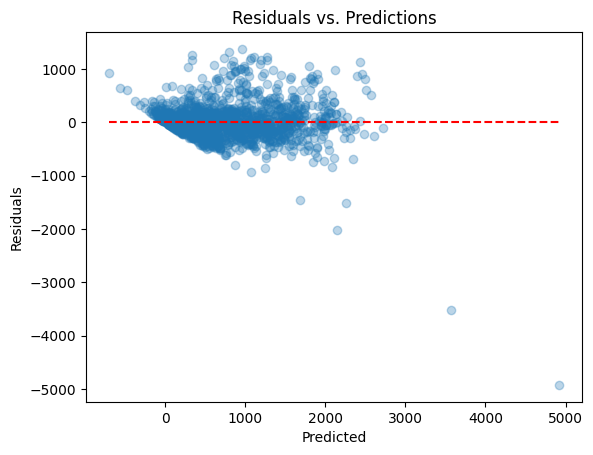

In [82]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(0, y_pred.min(), y_pred.max(), linestyles='dashed', colors='r')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predictions")
plt.show()


In [83]:
#  Task 4: Model evaluation and validation (45 mins)

# Perform cross-validation techniques to validate model performance (on both models- With Polynomial Features and without Polynomial Features)
# Assess models using test data
# Compare results across different regression models


In [84]:
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Randomized 5-fold CV: splits into 5 folds, shuffles rows first to approximate i.i.d. sampling
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# cross_validate: fit 'best' on each train split, evaluate on each test split
#    scoring:
#      • "neg_mean_squared_error": sklearn uses negative MSE so that "bigger is better"
#      • "r2": coefficient of determination, fraction of variance explained
cv = cross_validate(
    best,                               # selected pipeline/model
    X, y,                               # full feature matrix and target vector
    cv=kf,                              # use the randomized KFold splits
    scoring=("neg_mean_squared_error",  # returns negative MSE per fold
             "r2"),                     # returns r2 per fold
    n_jobs=-1                           # parallel execution across all CPU cores
)

# Aggregate results across folds
#    – For MSE: invert the sign to get the usual positive MSE
#    – For r2: simply average the fold-wise r2 scores
print("Shuffled CV MSE:", -np.mean(cv["test_neg_mean_squared_error"]))
print("Shuffled CV R²:", np.mean(cv["test_r2"]))


Shuffled CV MSE: 109745.10727165923
Shuffled CV R²: 0.7361832829336619


In [85]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate
import numpy as np

# cross validation in 5 splits in sequence of time to avoid data leakage
tscv = TimeSeriesSplit(n_splits=5)

cv_ts = cross_validate(
    best,       # best selected pipeline as defined above         
    X, y,       # use the full feature matrix and target
    cv=tscv,    # sequential splits in time order
    scoring=("neg_mean_squared_error", "r2"), # returns -MSE so “higher is better”
    n_jobs=-1    # run folds in parallel across cores
)

# Invert the neg-MSE to report standard MSE
print("TimeSeriesSplit CV MSE:", -np.mean(cv_ts["test_neg_mean_squared_error"]))
# Average the R² values across folds
print("TimeSeriesSplit CV R²:", np.mean(cv_ts["test_r2"]))
# results below for cv_ts is from a dictionary of arrays defined in print statements
# the r2 measures how well the model's predictions explain the variance in true target variables

TimeSeriesSplit CV MSE: 254005856.96384454
TimeSeriesSplit CV R²: -759.1784184717235


In [86]:
#       Task 5: Reporting and insights (30 mins)

# 1.    Summarize findings and key takeaways from the analysis
# 2.    Discuss feature importance and business implications
# 3.    Provide recommendations for further improvements

## Task 5: Reporting & Insights

- **Summary Findings & Key Takeaways**  
  - Recap top model performance:
    
   - **Recap top model performance**  
  - **Baseline linear models – R² ≈ 0.55**  
    A purely linear combination of all our features (time of day, temperature, humidity, etc.) explains about 55% of the hour-to-hour variability in bike rentals. The remaining 45% of the variability isn’t captured by just straight-line (linear) effects.  

  - **Cubic Ridge (degree=3) – R² ≈ 0.77 on the hold-out test set, 0.79 under shuffled CV**  
    By expanding every numerical feature into its square, cube, and all pairwise/three-way products, then fitting a Ridge (L2-penalized) model, we can capture curved and interacting effects. That boosted our explained variance from 55% up to 77% on the single test split, and 79% on average across random 5-fold splits.

    - Time-series CV revealed over-fitting (negative R2) without temporal features  
 
    
    - Where non-linear terms (PolynomialFeatures) helped: Captured complex weather/time interactions that a pure linear model missed (hence R² jump from 0.55 to 0.77).

    - Where non-linear terms (PolynomialFeatures) failed: Lacked a context for the time of day in order to apply that to a prediction. (e.g. “What was yesterday’s demand at this hour?”), so it over-extrapolated when tested on future data blocks, leading to negative R² under TimeSeriesSplit  Also the MSE went crazy as compared to shuffled CV.  So it was not generalizing well.
   
      
- **Feature Importance & Business Implications**  
  - To find out which factors really move bike rentals, we can either look at the size of each fitted weight in our Ridge model or—if we’re using a more complex model—randomly shuffle each feature and see how badly the model’s performance suffers; whichever features cause the biggest drop are our top ‘drivers.’
    - Likely top features: hour of day, temperature x humidity, lagged counts (once added).  
  - Translate to business:  
    - "Peak rentals occur around 8 AM and 5 PM on weekdays."  
    - "Comfort index (temperature x humidity) strongly predicts demand - plan for extra bikes on mild, dry days."

- **Provide Recommendations for Further Improvements**  
  1. **Inject Time-Series Features**  
     - Add `lag_1h`, `lag_24h`, rolling averages to capture autocorrelation.  
  2. **Test Tree-Based Models**  
     - Use RandomForest or XGBoost to handle non-linearities and time-lag features.  
  3. **Simplify Polynomial Features**  
     - If over-fitting persists, limit degree to 2 or remove high-order interactions.  
  4. **Operationalize the Model**  
     - Retrain weekly as new data arrives.  
     - Deploy as a scheduled job that outputs hour-ahead forecasts to your operations dashboard.  
